This notebook calculates reconstruction bias and RMSE for the different sampling experiments (reconstructions are compared to the "model truth" of the Large Ensemble Testbed), and we show the testbed spread using boxplots. 

This notebook was created by Thea Hatlen Heimdal, in collaboration with Abby Shaum and Julius Busecke 

In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
# List of all LET members

path_LET = "/local/data/artemis/workspace/theimdal/saildrone/LET_pickle_files/members_LET_dict.pickle" 

with open(path_LET,'rb') as handle:
    mems_dict = pickle.load(handle)

## Bring in reconstructions and testbed truth

### SOCAT Baseline

In [3]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/SOCAT/models/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_SOCAT_only = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Historical + SOCAT

### Baseline

In [4]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/GO-BGC/models/500_floats/baseline/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_500_historical_baseline = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Biased floats

In [5]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/GO-BGC/models/500_floats/bias4/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_500_historical_bias = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Floats with random uncertainty

In [6]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/GO-BGC/models/500_floats/uncertainty11/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_500_historical_uncertainty = xr.concat(datasets_ens, dim='ensemble', join='override') 

## Optimized + SOCAT

### Baseline

In [7]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/GO-BGC/models/500_floats_optimized/baseline/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_500_optimized_baseline = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Biased floats

In [8]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/GO-BGC/models/500_floats_optimized/bias4/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_500_optimized_bias = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Floats with random uncertainty

In [9]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/GO-BGC/models/500_floats_optimized/uncertainty11/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_500_optimized_uncertainty = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Calculate bias

In [11]:
mean_vars = ['time', 'status', 'ylat', 'xlon']
ylat_slice = slice(-90,90)
time_slice = slice('2000', '2016')

bias_SOCAT = ds_SOCAT_only.diff('status').sel(ylat=ylat_slice,time=time_slice).mean(mean_vars)
bias_hist_baseline = ds_500_historical_baseline.diff('status').sel(ylat=ylat_slice,time=time_slice).mean(mean_vars)
bias_hist_biased = ds_500_historical_bias.diff('status').sel(ylat=ylat_slice,time=time_slice).mean(mean_vars)
bias_hist_error = ds_500_historical_uncertainty.diff('status').sel(ylat=ylat_slice,time=time_slice).mean(mean_vars)
bias_opt_baseline = ds_500_optimized_baseline.diff('status').sel(ylat=ylat_slice,time=time_slice).mean(mean_vars)
bias_opt_biased = ds_500_optimized_bias.diff('status').sel(ylat=ylat_slice,time=time_slice).mean(mean_vars)
bias_opt_error = ds_500_optimized_uncertainty.diff('status').sel(ylat=ylat_slice,time=time_slice).mean(mean_vars)

In [12]:
bias_SOCAT_full = bias_SOCAT.to_dataframe()
bias_hist_baseline_full = bias_hist_baseline.to_dataframe()
bias_hist_biased_full = bias_hist_biased.to_dataframe()
bias_hist_error_full = bias_hist_error.to_dataframe()
bias_opt_baseline_full = bias_opt_baseline.to_dataframe()
bias_opt_biased_full = bias_opt_biased.to_dataframe()
bias_opt_error_full = bias_opt_error.to_dataframe()

In [13]:
SOCAT_reset = bias_SOCAT_full.reset_index()
bias_hist_baseline_reset = bias_hist_baseline_full.reset_index()
bias_hist_biased_reset = bias_hist_biased_full.reset_index()
bias_hist_error_reset = bias_hist_error_full.reset_index()
bias_opt_baseline_reset = bias_opt_baseline_full.reset_index()
bias_opt_biased_reset = bias_opt_biased_full.reset_index()
bias_opt_error_reset = bias_opt_error_full.reset_index()

In [14]:
SOCAT_set_index = SOCAT_reset.set_index(['ensemble','n_member','member'])
bias_hist_baseline_set_index = bias_hist_baseline_reset.set_index(['ensemble','n_member','member'])
bias_hist_biased_winter_set_index = bias_hist_biased_reset.set_index(['ensemble','n_member','member'])
bias_hist_error_set_index = bias_hist_error_reset.set_index(['ensemble','n_member','member'])
bias_opt_baseline_set_index = bias_opt_baseline_reset.set_index(['ensemble','n_member','member'])
bias_opt_biased_set_index = bias_opt_biased_reset.set_index(['ensemble','n_member','member'])
bias_opt_error_set_index = bias_opt_error_reset.set_index(['ensemble','n_member','member'])

In [15]:
SOCAT_final = SOCAT_set_index
bias_hist_baseline_final = bias_hist_baseline_set_index
bias_hist_biased_final = bias_hist_biased_winter_set_index
bias_hist_error_final = bias_hist_error_set_index
bias_opt_baseline_final = bias_opt_baseline_set_index
bias_opt_biased_final = bias_opt_biased_set_index
bias_opt_error_final = bias_opt_error_set_index

### Make boxplot (Globally, 2000-2016)

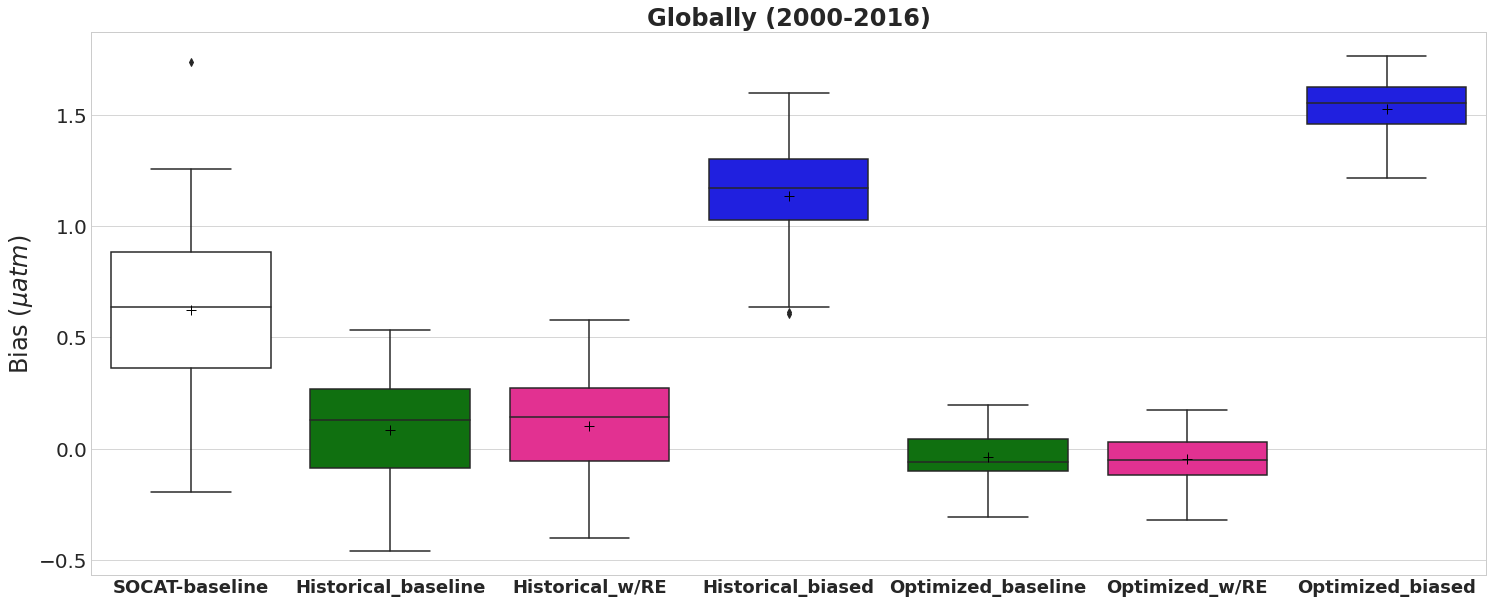

In [15]:
colors = ['white','green', 'deeppink','blue', 'green','deeppink','blue']
labels = ['SOCAT-baseline','Historical_baseline', 'Historical_w/RE','Historical_biased', 'Optimized_baseline', 'Optimized_w/RE', 'Optimized_biased']

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(25,10))
    sns.boxplot(data = [SOCAT_final,bias_hist_baseline_final, bias_hist_error_final, bias_hist_biased_final,bias_opt_baseline_final, bias_opt_error_final, bias_opt_biased_final], palette = colors, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    #plt.xlabel("Runs", fontsize = 20)
    plt.title('Globally (2000-2016)', fontsize= 24, weight='bold')
    plt.ylabel(f'Bias ($\mu atm$)', fontsize = 24)
    plt.xticks(ticks = [0,1,2,3,4,5,6], fontsize = 18, labels = labels, weight='bold')
    plt.yticks(fontsize = 20)
    
##fig.savefig("/home/theimdal/bias_globally_2000-2016_boxplot.jpg",dpi=300, bbox_inches="tight")

### Per model

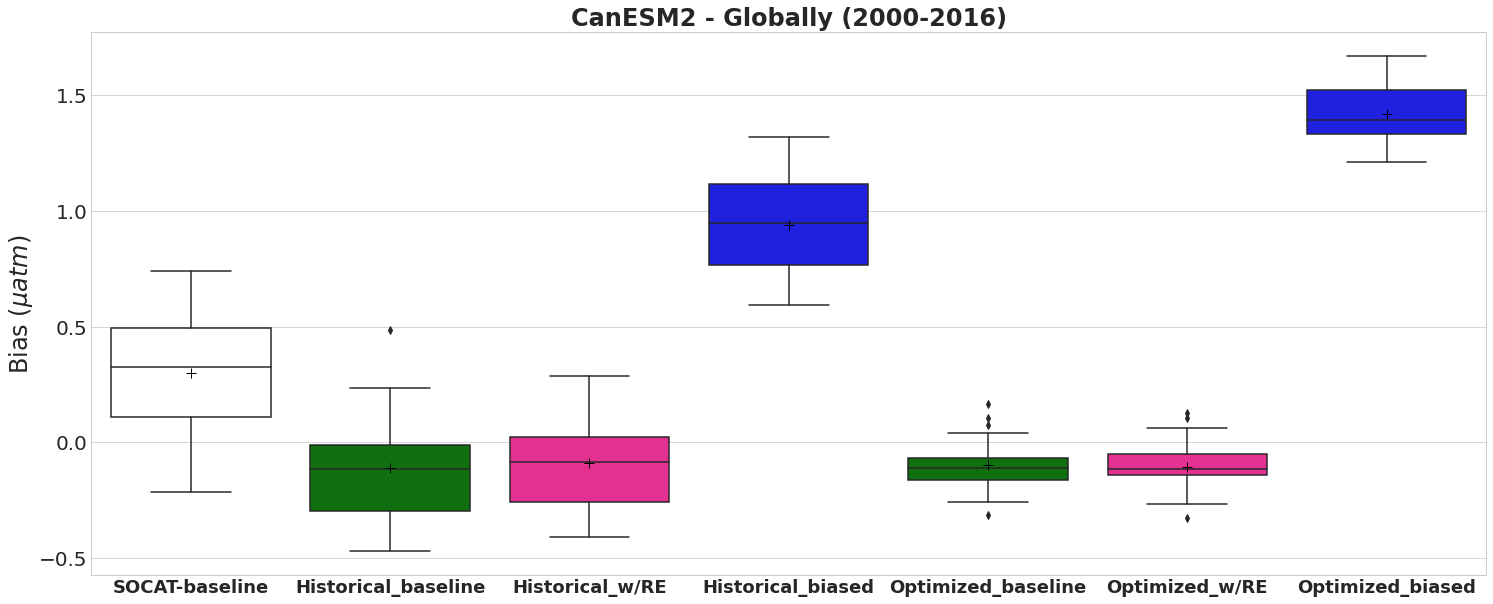

In [16]:
colors = ['white','green', 'deeppink','blue', 'green','deeppink','blue']
labels = ['SOCAT-baseline','Historical_baseline', 'Historical_w/RE','Historical_biased', 'Optimized_baseline', 'Optimized_w/RE', 'Optimized_biased']

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(25,10))
    sns.boxplot(data = [SOCAT_final,bias_hist_baseline_final, bias_hist_error_final, bias_hist_biased_final,bias_opt_baseline_final, bias_opt_error_final, bias_opt_biased_final], palette = colors, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    #plt.xlabel("Runs", fontsize = 20)
    plt.title('CanESM2 - Globally (2000-2016)', fontsize= 24, weight='bold')
    plt.ylabel(f'Bias ($\mu atm$)', fontsize = 24)
    plt.xticks(ticks = [0,1,2,3,4,5,6], fontsize = 18, labels = labels, weight='bold')
    plt.yticks(fontsize = 20)
    
#fig.savefig("/home/theimdal/bias_CanESM2_globally_2000-2016_boxplot.jpg",dpi=300, bbox_inches="tight")

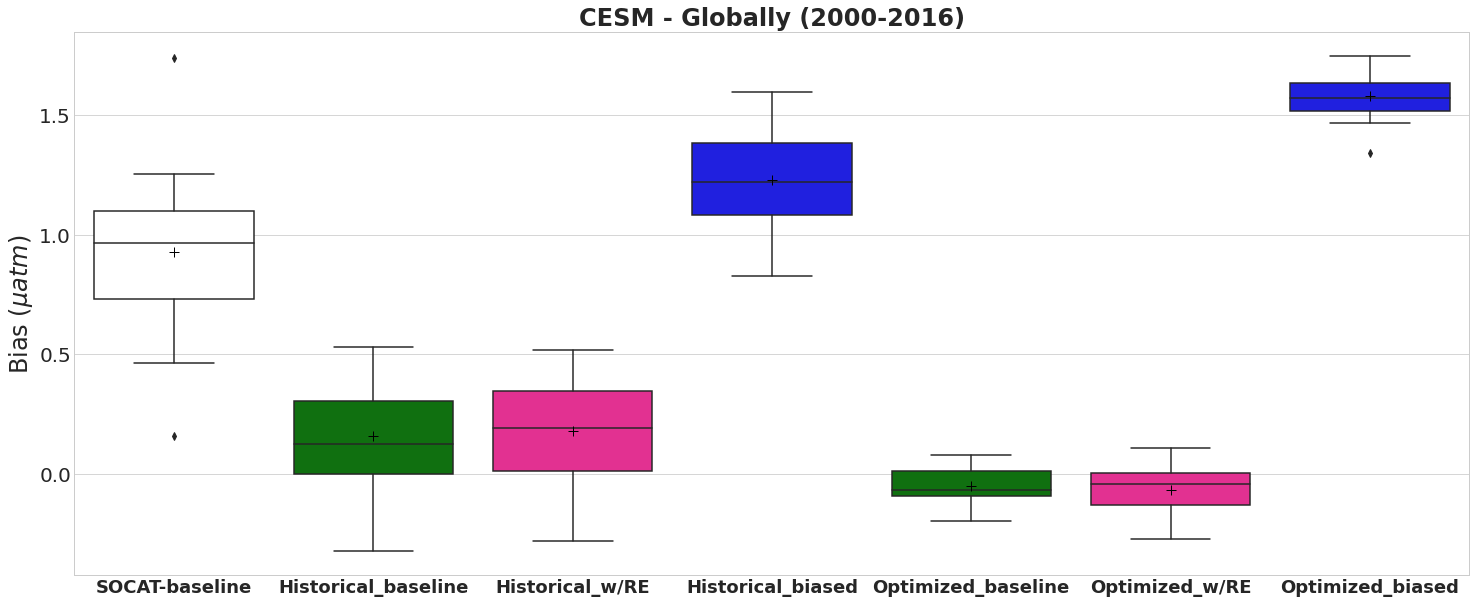

In [15]:
colors = ['white','green', 'deeppink','blue', 'green','deeppink','blue']
labels = ['SOCAT-baseline','Historical_baseline', 'Historical_w/RE','Historical_biased', 'Optimized_baseline', 'Optimized_w/RE', 'Optimized_biased']

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(25,10))
    sns.boxplot(data = [SOCAT_final,bias_hist_baseline_final, bias_hist_error_final, bias_hist_biased_final,bias_opt_baseline_final, bias_opt_error_final, bias_opt_biased_final], palette = colors, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    #plt.xlabel("Runs", fontsize = 20)
    plt.title('CESM - Globally (2000-2016)', fontsize= 24, weight='bold')
    plt.ylabel(f'Bias ($\mu atm$)', fontsize = 24)
    plt.xticks(ticks = [0,1,2,3,4,5,6], fontsize = 18, labels = labels, weight='bold')
    plt.yticks(fontsize = 20)
    
#fig.savefig("/home/theimdal/bias_CESM_globally_2000-2016_boxplot.jpg",dpi=300, bbox_inches="tight")

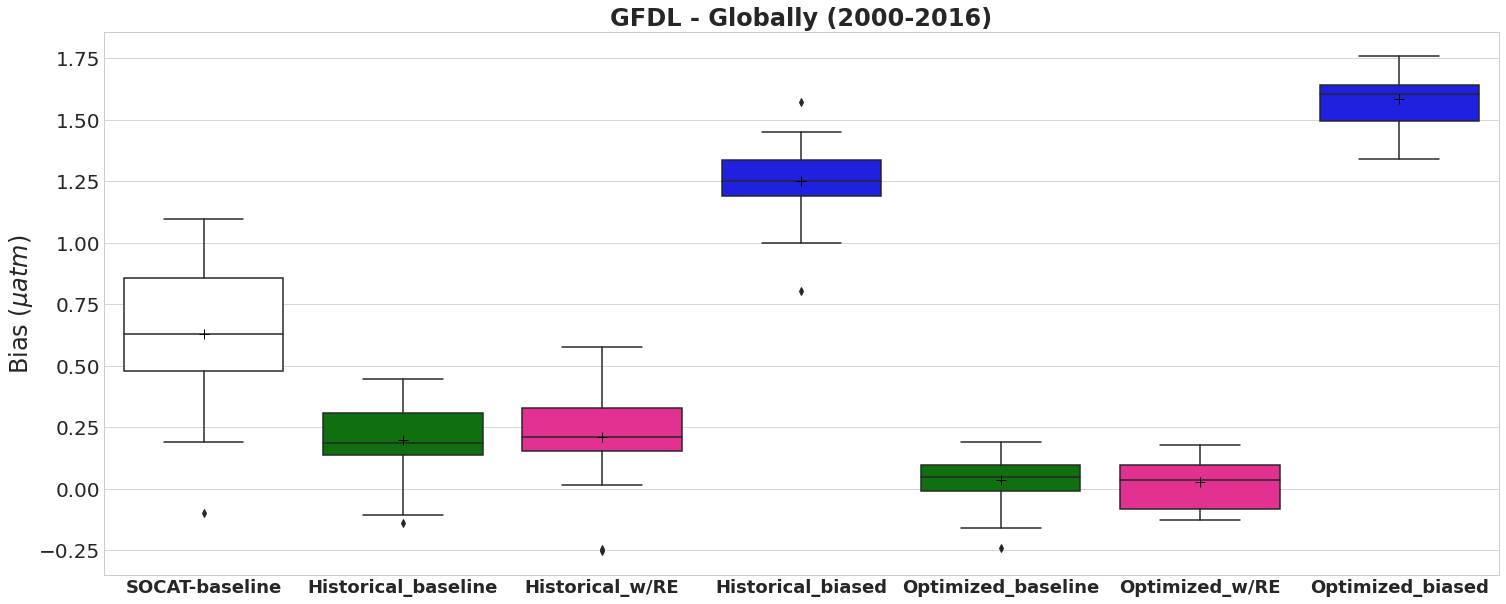

In [22]:
colors = ['white','green', 'deeppink','blue', 'green','deeppink','blue']
labels = ['SOCAT-baseline','Historical_baseline', 'Historical_w/RE','Historical_biased', 'Optimized_baseline', 'Optimized_w/RE', 'Optimized_biased']

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(25,10))
    sns.boxplot(data = [SOCAT_final,bias_hist_baseline_final, bias_hist_error_final, bias_hist_biased_final,bias_opt_baseline_final, bias_opt_error_final, bias_opt_biased_final], palette = colors, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    #plt.xlabel("Runs", fontsize = 20)
    plt.title('GFDL - Globally (2000-2016)', fontsize= 24, weight='bold')
    plt.ylabel(f'Bias ($\mu atm$)', fontsize = 24)
    plt.xticks(ticks = [0,1,2,3,4,5,6], fontsize = 18, labels = labels, weight='bold')
    plt.yticks(fontsize = 20)
    
#fig.savefig("/home/theimdal/bias_GFDL_globally_2000-2016_boxplot.jpg",dpi=300, bbox_inches="tight")

### Calculate RMSE

In [17]:
mean_vars = ['time', 'status', 'ylat', 'xlon']
ylat_slice = slice(-90,90)
time_slice = slice('2000', '2016')

RMSE_SOCAT = xr.ufuncs.sqrt(((ds_SOCAT_only.diff('status'))**2).sel(ylat=ylat_slice,time=time_slice).mean(mean_vars))
RMSE_historical_baseline = xr.ufuncs.sqrt(((ds_500_historical_baseline.diff('status'))**2).sel(ylat=ylat_slice,time=time_slice).mean(mean_vars))
RMSE_historical_bias = xr.ufuncs.sqrt(((ds_500_historical_bias.diff('status'))**2).sel(ylat=ylat_slice,time=time_slice).mean(mean_vars))
RMSE_historical_error = xr.ufuncs.sqrt(((ds_500_historical_uncertainty.diff('status'))**2).sel(ylat=ylat_slice,time=time_slice).mean(mean_vars))
RMSE_optimized_baseline = xr.ufuncs.sqrt(((ds_500_optimized_baseline.diff('status'))**2).sel(ylat=ylat_slice,time=time_slice).mean(mean_vars))
RMSE_optimized_bias = xr.ufuncs.sqrt(((ds_500_optimized_bias.diff('status'))**2).sel(ylat=ylat_slice,time=time_slice).mean(mean_vars))
RMSE_optimized_error = xr.ufuncs.sqrt(((ds_500_optimized_uncertainty.diff('status'))**2).sel(ylat=ylat_slice,time=time_slice).mean(mean_vars))

In [18]:
#### Dataframe for boxplot

RMSE_SOCAT_full = RMSE_SOCAT.to_dataframe()
RMSE_historical_baseline_full = RMSE_historical_baseline.to_dataframe()
RMSE_historical_bias_full = RMSE_historical_bias.to_dataframe()
RMSE_historical_error_full = RMSE_historical_error.to_dataframe()
RMSE_optimized_baseline_full = RMSE_optimized_baseline.to_dataframe()
RMSE_optimized_bias_full = RMSE_optimized_bias.to_dataframe()
RMSE_optimized_error_full = RMSE_optimized_error.to_dataframe()

In [19]:
### Reset index

RMSE_SOCAT_reset = RMSE_SOCAT_full.reset_index()
RMSE_historical_baseline_reset = RMSE_historical_baseline_full.reset_index()
RMSE_historical_bias_reset = RMSE_historical_bias_full.reset_index()
RMSE_historical_error_reset = RMSE_historical_error_full.reset_index()
RMSE_optimized_baseline_reset = RMSE_optimized_baseline_full.reset_index()
RMSE_optimized_bias_reset = RMSE_optimized_bias_full.reset_index()
RMSE_optimized_error_reset = RMSE_optimized_error_full.reset_index()

In [20]:
### Set index

RMSE_SOCAT_set_index = RMSE_SOCAT_reset.set_index(['ensemble','n_member','member'])
RMSE_historical_baseline_set_index = RMSE_historical_baseline_reset.set_index(['ensemble','n_member','member'])
RMSE_historical_bias_set_index = RMSE_historical_bias_reset.set_index(['ensemble','n_member','member'])
RMSE_historical_error_set_index = RMSE_historical_error_reset.set_index(['ensemble','n_member','member'])
RMSE_optimized_baseline_set_index = RMSE_optimized_baseline_reset.set_index(['ensemble','n_member','member'])
RMSE_optimized_bias_set_index = RMSE_optimized_bias_reset.set_index(['ensemble','n_member','member'])
RMSE_optimized_error_set_index = RMSE_optimized_error_reset.set_index(['ensemble','n_member','member'])

In [21]:
### Rename for plotting

RMSE_SOCAT_final = RMSE_SOCAT_set_index
RMSE_hist_baseline_final = RMSE_historical_baseline_set_index
RMSE_hist_bias_final = RMSE_historical_bias_set_index
RMSE_hist_error_final = RMSE_historical_error_set_index
RMSE_opt_baseline_final = RMSE_optimized_baseline_set_index
RMSE_opt_bias_final = RMSE_optimized_bias_set_index
RMSE_opt_error_final = RMSE_optimized_error_set_index

### Make boxplot (Globally, 2000-2016)

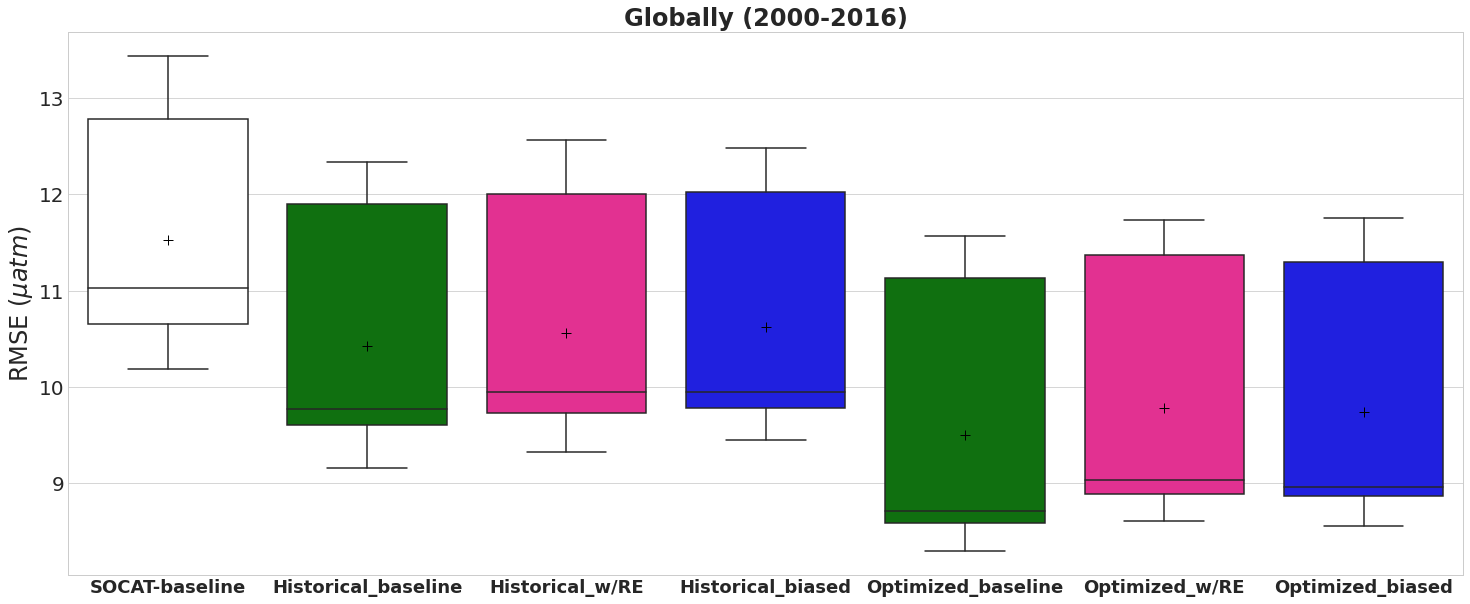

In [21]:
colors = ['white','green', 'deeppink','blue', 'green','deeppink','blue']
labels = ['SOCAT-baseline','Historical_baseline', 'Historical_w/RE','Historical_biased', 'Optimized_baseline', 'Optimized_w/RE', 'Optimized_biased']

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(25,10))
    sns.boxplot(data = [RMSE_SOCAT_final,RMSE_hist_baseline_final, RMSE_hist_error_final, RMSE_hist_bias_final, RMSE_opt_baseline_final, RMSE_opt_error_final, RMSE_opt_bias_final], palette = colors, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    #plt.xlabel("Runs", fontsize = 20)
    plt.title('Globally (2000-2016)', fontsize= 24, weight='bold')
    plt.ylabel(f'RMSE ($\mu atm$)', fontsize = 24)
    plt.xticks(ticks = [0,1,2,3,4,5,6], fontsize = 18, labels = labels, weight='bold')
    plt.yticks(fontsize = 20)
    
#fig.savefig("/home/theimdal/RMSE_globally_2000-2016_boxplot.jpg",dpi=300, bbox_inches="tight")

### Individual models

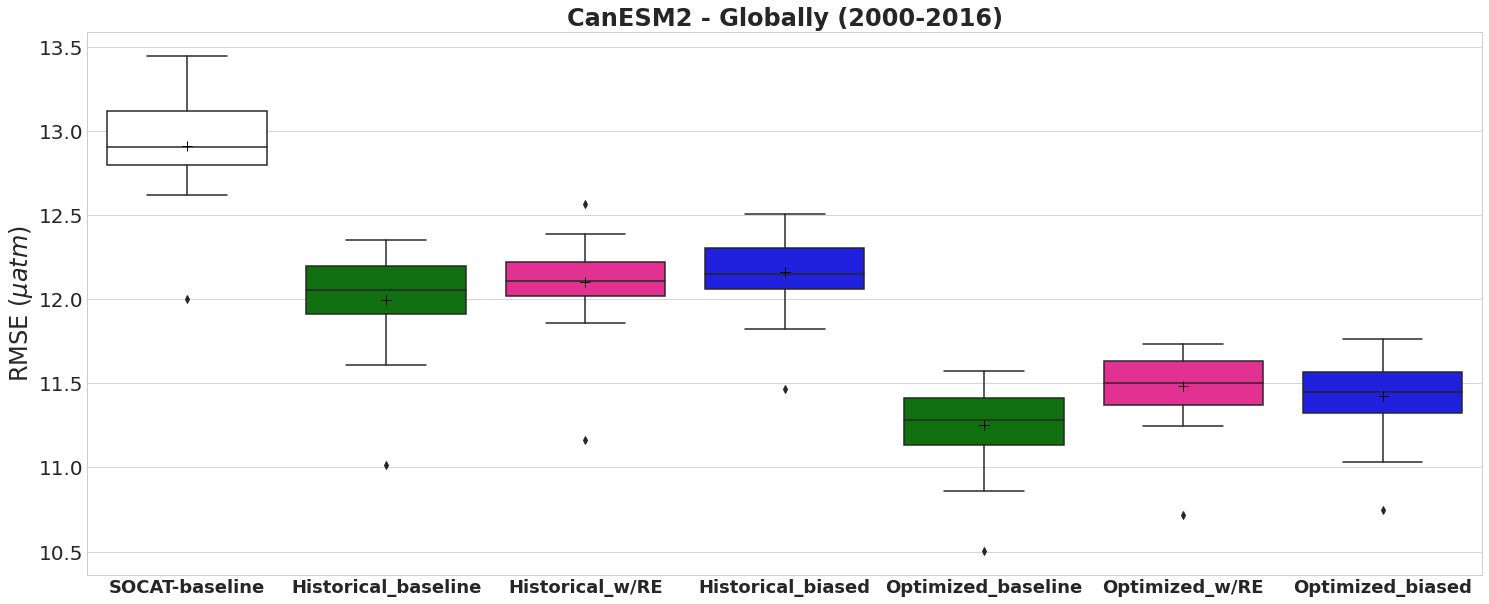

In [22]:
colors = ['white','green', 'deeppink','blue', 'green','deeppink','blue']
labels = ['SOCAT-baseline','Historical_baseline', 'Historical_w/RE','Historical_biased', 'Optimized_baseline', 'Optimized_w/RE', 'Optimized_biased']

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(25,10))
    sns.boxplot(data = [RMSE_SOCAT_final,RMSE_hist_baseline_final, RMSE_hist_error_final, RMSE_hist_bias_final, RMSE_opt_baseline_final, RMSE_opt_error_final, RMSE_opt_bias_final], palette = colors, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    #plt.xlabel("Runs", fontsize = 20)
    plt.title('CanESM2 - Globally (2000-2016)', fontsize= 24, weight='bold')
    plt.ylabel(f'RMSE ($\mu atm$)', fontsize = 24)
    plt.xticks(ticks = [0,1,2,3,4,5,6], fontsize = 18, labels = labels, weight='bold')
    plt.yticks(fontsize = 20)
    
#fig.savefig("/home/theimdal/RMSE_CanESM2_globally_2000-2016_boxplot.jpg",dpi=300, bbox_inches="tight")

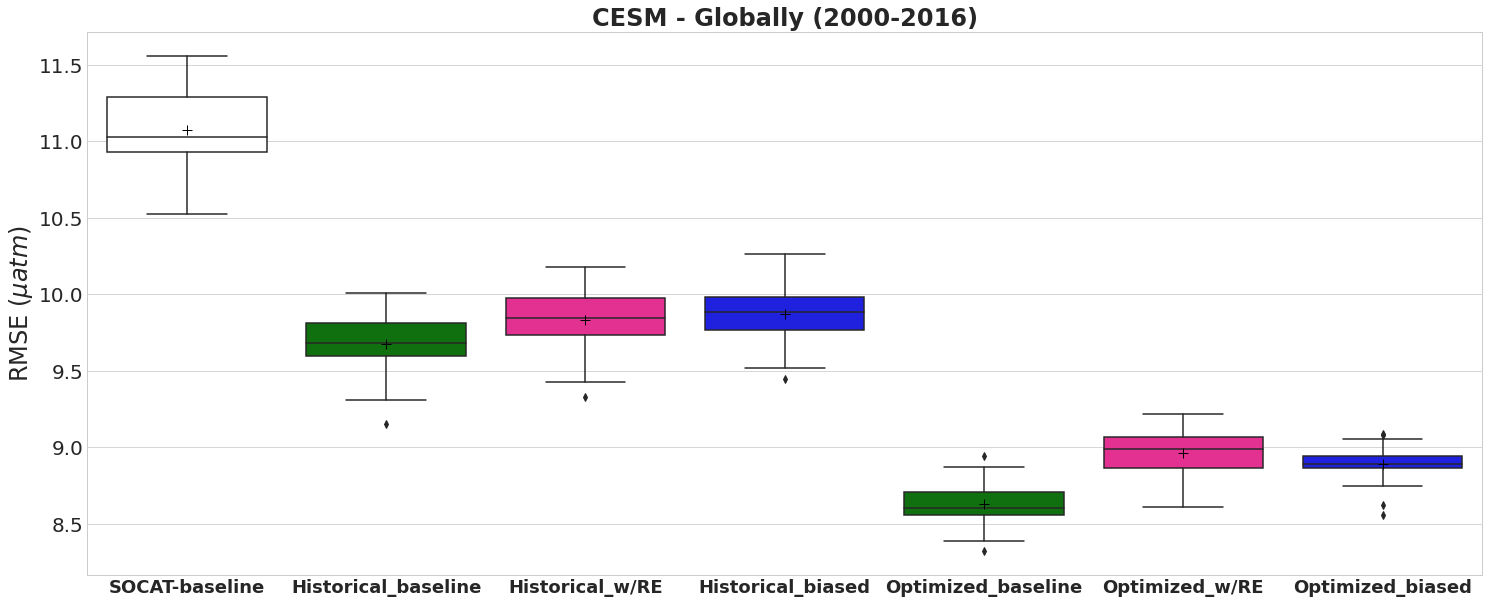

In [21]:
colors = ['white','green', 'deeppink','blue', 'green','deeppink','blue']
labels = ['SOCAT-baseline','Historical_baseline', 'Historical_w/RE','Historical_biased', 'Optimized_baseline', 'Optimized_w/RE', 'Optimized_biased']

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(25,10))
    sns.boxplot(data = [RMSE_SOCAT_final,RMSE_hist_baseline_final, RMSE_hist_error_final, RMSE_hist_bias_final, RMSE_opt_baseline_final, RMSE_opt_error_final, RMSE_opt_bias_final], palette = colors, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    #plt.xlabel("Runs", fontsize = 20)
    plt.title('CESM - Globally (2000-2016)', fontsize= 24, weight='bold')
    plt.ylabel(f'RMSE ($\mu atm$)', fontsize = 24)
    plt.xticks(ticks = [0,1,2,3,4,5,6], fontsize = 18, labels = labels, weight='bold')
    plt.yticks(fontsize = 20)
    
#fig.savefig("/home/theimdal/RMSE_CESM_globally_2000-2016_boxplot.jpg",dpi=300, bbox_inches="tight")

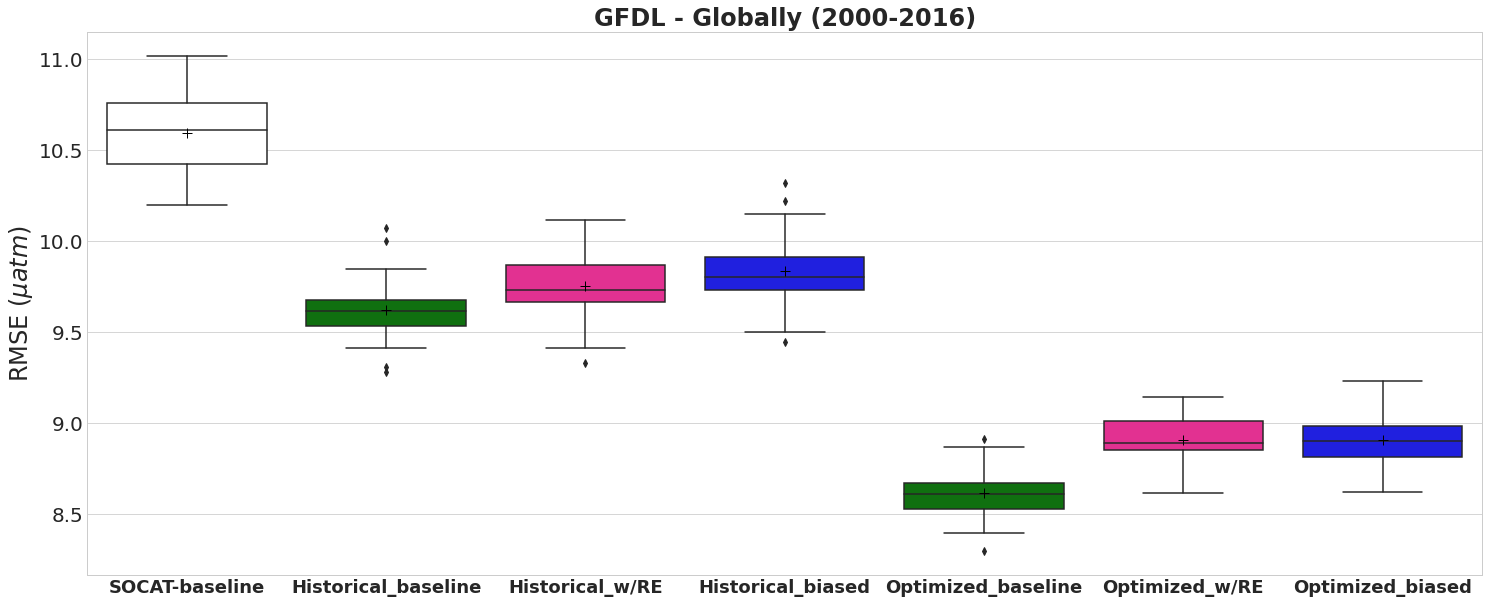

In [23]:
colors = ['white','green', 'deeppink','blue', 'green','deeppink','blue']
labels = ['SOCAT-baseline','Historical_baseline', 'Historical_w/RE','Historical_biased', 'Optimized_baseline', 'Optimized_w/RE', 'Optimized_biased']

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(25,10))
    sns.boxplot(data = [RMSE_SOCAT_final,RMSE_hist_baseline_final, RMSE_hist_error_final, RMSE_hist_bias_final, RMSE_opt_baseline_final, RMSE_opt_error_final, RMSE_opt_bias_final], palette = colors, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    #plt.xlabel("Runs", fontsize = 20)
    plt.title('GFDL - Globally (2000-2016)', fontsize= 24, weight='bold')
    plt.ylabel(f'RMSE ($\mu atm$)', fontsize = 24)
    plt.xticks(ticks = [0,1,2,3,4,5,6], fontsize = 18, labels = labels, weight='bold')
    plt.yticks(fontsize = 20)
    
#fig.savefig("/home/theimdal/RMSE_GFDL_globally_2000-2016_boxplot.jpg",dpi=300, bbox_inches="tight")